# A. Supervised Learning

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score

In [86]:
df = pd.read_csv("WineQT.csv")

In [88]:
# Variabel (X) dan target (y)
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
          'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = df['quality']

In [89]:
# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## A1 Metode SVM

In [90]:
# Inisialisasi model SVC
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

SVC()

In [91]:
# Prediksi kualitas anggur
y_pred = svm_classifier.predict(X_test)

## A2 Evaluasi Metode Klasifikasi

In [92]:
# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[ 0  2  4  0  0]
 [ 0 41 55  0  0]
 [ 0 12 87  0  0]
 [ 0  1 24  1  0]
 [ 0  0  2  0  0]]


In [93]:
# Classification Report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.43      0.54        96
           6       0.51      0.88      0.64        99
           7       1.00      0.04      0.07        26
           8       0.00      0.00      0.00         2

    accuracy                           0.56       229
   macro avg       0.45      0.27      0.25       229
weighted avg       0.64      0.56      0.51       229



c:\Users\TUF-DASH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\TUF-DASH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\TUF-DASH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

## A3 Plot SVM

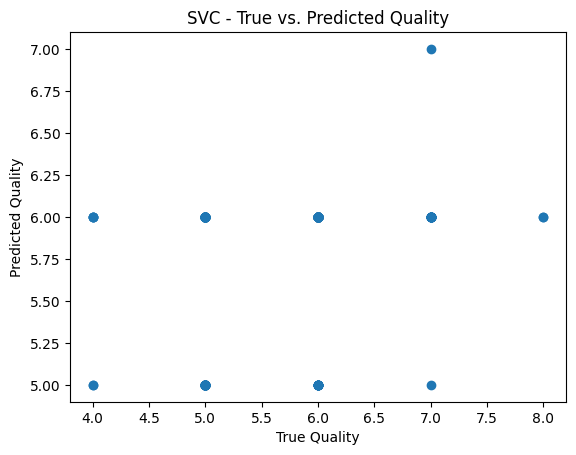

In [94]:
# A3.1: Plot hasil prediksi
plt.scatter(y_test, y_pred)
plt.xlabel("True Quality")
plt.ylabel("Predicted Quality")
plt.title("SVC - True vs. Predicted Quality")
plt.show()

## A1 Metode Linear Regression

In [95]:
# A1.2: Linear Regression (Regresi)
# Pilih hanya 2 fitur untuk Linear Regression
X_reg = df[['sulphates', 'alcohol']]

In [96]:
# Bagi dataset menjadi data latih dan data uji
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y, test_size=0.2, random_state=42)

In [97]:
# Inisialisasi model Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_reg, y_train_reg)

LinearRegression()

In [98]:
# Prediksi kualitas anggur
y_pred_reg = linear_reg.predict(X_test_reg)

## A2 Evaluasi Metode Regresi

In [99]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
print("Mean Absolute Error:", mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# R-squared (R2) Score
r2 = r2_score(y_test_reg, y_pred_reg)
print("R-squared (R2) Score:", r2)

Mean Absolute Error: 0.49256725897676285
Mean Squared Error: 0.3879876756341922
Root Mean Squared Error: 0.6228865672288914
R-squared (R2) Score: 0.3027735693943986


## A3 Plot Linear Regression

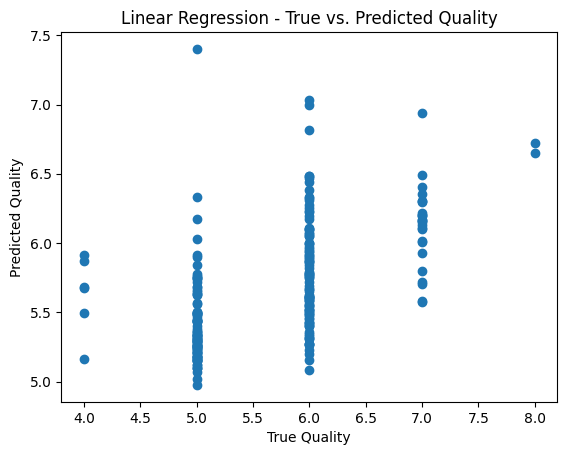

In [100]:
# A3.2: Plot hasil prediksi
plt.scatter(y_test_reg, y_pred_reg)
plt.xlabel("True Quality")
plt.ylabel("Predicted Quality")
plt.title("Linear Regression - True vs. Predicted Quality")
plt.show()

# B. Unsupervised Learning

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, completeness_score, homogeneity_score


In [102]:
# Load dataset
data = pd.read_csv('WineQT.csv')

In [103]:
# Variabel (X)
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
          'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

## B1 Metode K-Means

In [104]:
# Tentukan jumlah cluster (K) sesuai jumlah target (quality)
K = len(data['quality'].unique())
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(X)



c:\Users\TUF-DASH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## B2 Cluster yang Telah Diprediksi

In [109]:
# Prediksi cluster
clusters = kmeans.predict(X)
centers = kmeans.cluster_centers_

### Tanpa Label Asli

In [110]:
# Tanpa label asli dataset (3 metrik evaluasi)
silhouette_score_value = silhouette_score(X, clusters)
davies_bouldin_score_value = davies_bouldin_score(X, clusters)
calinski_harabasz_score_value = calinski_harabasz_score(X, clusters)
print("Silhouette Score:", silhouette_score_value)
print("Davies-Bouldin Score:", davies_bouldin_score_value)
print("Calinski-Harabasz Score:", calinski_harabasz_score_value)

Silhouette Score: 0.4402458569037605
Davies-Bouldin Score: 0.6647444436093064
Calinski-Harabasz Score: 2293.4693252287598


### Dengan Label Asli

In [111]:
# Ambil label kualitas (quality) sebagai label asli
true_labels = data['quality']

In [112]:
# Dengan label asli dataset (4 metrik evaluasi)
# Adjusted Rand Index (ARI)
ari = adjusted_rand_score(true_labels, clusters)
print("Adjusted Rand Index (ARI):", ari)

# Normalized Mutual Information (NMI)
nmi = normalized_mutual_info_score(true_labels, clusters)
print("Normalized Mutual Information (NMI):", nmi)

# Completeness Score
completeness = completeness_score(true_labels, clusters)
print("Completeness Score:", completeness)

# Homogeneity Score
homogeneity = homogeneity_score(true_labels, clusters)
print("Homogeneity Score:", homogeneity)

Adjusted Rand Index (ARI): -0.0015459789119715197
Normalized Mutual Information (NMI): 0.0435370095102295
Completeness Score: 0.03941897435115716
Homogeneity Score: 0.04861582440828159


## B3 Plot Hasil Clustering

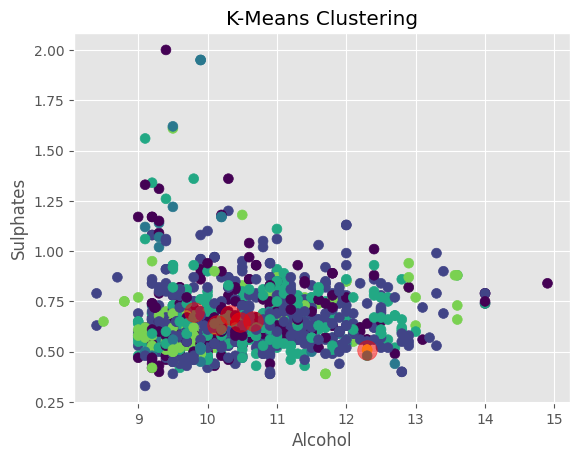

In [118]:
plt.style.use('ggplot')
plt.scatter(X['alcohol'], X['sulphates'], c=clusters, s=50, cmap='viridis')
plt.scatter(centers[:, 10], centers[:, 9], c='red', s=200, alpha=0.5)
plt.xlabel("Alcohol")
plt.ylabel("Sulphates")
plt.title("K-Means Clustering")
plt.show()